# 95-791 Data Mining (Fall 2021) - Final Project, Part 4
### Name: Jamie Lim, Thomas Tam, Tina Feng

# Question 3: 
What are the characteristics of subgroups of recidivists?

For this task, in order to discover the latent structure in our dataset, we use models from unsupervised learning. 

Models:
We focus here the 2 well-known clustering approaches, namely: 

1. K-means Clustering
2. Hiearchical Clustering (Agglomerative)

Data Preparation: 
1. The 4 target variables `Recidivism_Within_3years`,`Recidivism_Arrest_Year1`, `Recidivism_Arrest_Year2`, `Recidivism_Arrest_Year3` are dopped in this section. 
2. Only the top 7 features identified in Question 1 are used here, namely 'Percent_Days_Employed','Jobs_Per_Year','Prior_Arrest_Episodes_PPViolationCharges','Age_at_Release',       'Gang_Affiliated','Supervision_Risk_Score_First','Prior_Arrest_Episodes_Felony',  and unlike prediction task, we do not have to split the dataset into training and testing sets

Technically, we are using KMeans and AgglomerativeClustering from sklearn

In [1]:
# import library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from yellowbrick.features import RadViz
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import plotly as py
from IPython.display import Image

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
# read csv file
df_cleaned = pd.read_csv('df_cleaned.csv')

In [3]:
# dropping the target varibles from dataframe

df_c = df_cleaned[df_cleaned['Recidivism_Within_3years']==1]
X = df_c.drop(['Recidivism_Within_3years','Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3'], axis=1)
X = X[['Percent_Days_Employed','Jobs_Per_Year','Prior_Arrest_Episodes_PPViolationCharges','Age_at_Release',
       'Gang_Affiliated','Supervision_Risk_Score_First','Prior_Arrest_Episodes_Felony']]
X.reset_index(drop=True, inplace=True)
X

Percent_Days_Employed  Jobs_Per_Year  \
0                   0.425234       2.000000   
1                   0.000000       0.000000   
2                   0.203562       0.929389   
3                   0.000000       0.000000   
4                   0.000000       0.000000   
...                      ...            ...   
13717               0.000000       0.000000   
13718               0.189507       0.572044   
13719               0.757098       0.576104   
13720               0.711138       0.894125   
13721               0.124454       0.398745   

       Prior_Arrest_Episodes_PPViolationCharges  Age_at_Release  \
0                                           5.0             3.0   
1                                           5.0             6.0   
2                                           3.0             3.0   
3                                           5.0             6.0   
4                                           3.0             5.0   
...                                         ...             ...   
13717                                       0.0             5.0   
13718                                       0.0             1.0   
13719                                       0.0             4.0   
13720                                       0.0             3.0   
13721                                       5.0             2.0   

       Gang_Affiliated  Supervision_Risk_Score_First  \
0                  0.0                           5.0   
1                  0.0                           6.0   
2                  0.0                           3.0   
3                  0.0                           1.0   
4                  0.0                           6.0   
...                ...                           ...   
13717              0.0                           4.0   
13718              0.0                           4.0   
13719              0.0                           4.0   
13720              0.0                           4.0   
13721              0.0                           4.0   

       Prior_Arrest_Episodes_Felony  
0                               8.0  
1                               7.0  
2                               5.0  
3                               2.0  
4                               2.0  
...                             ...  
13717                           0.0  
13718                           3.0  
13719                           0.0  
13720                           0.0  
13721                           7.0  

[13722 rows x 7 columns]

## 3.1 K-means Clustering

### 3.1.1 Picking an "optimal" k using Elbow Plot with different metrics

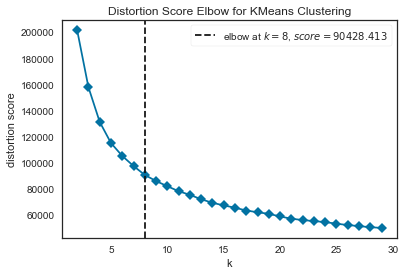

In [4]:
km = KMeans(random_state=0)
#run from k=2 to k=30 for elbow graph
visualizer = KElbowVisualizer(km, k=(2,30), timings = False,)
visualizer.fit(X)
# display the plot
visualizer.show(); 

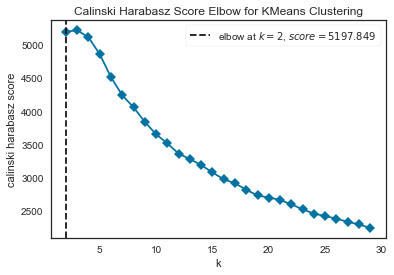

In [5]:
# locate_elbow=False
visualizer_ch = KElbowVisualizer(km, k=(2,30), metric='calinski_harabasz',timings=False)
visualizer_ch.fit(X)

# display the plot
visualizer_ch.show();

**Comment:**

- We use the K Elbow plots to select the optimal number of clusters. 
- In the first plot,  the distortion metric is used, and k = 8 is suggested by the plot
- And in the second plot the 'calinski_harabasz' metric is used, k = 2 is suggested. 
- However by looking at the second plot, ,we can see that k = 3 or k = 4 might be a better idea. Hence, we try to re-fit our K Means models with k= 3, 4, and 8 from here.

In [6]:
# picking k based on the discussion above
km_k8 = KMeans(random_state=0, n_clusters=8).fit(X)
km_k4 = KMeans(random_state=0, n_clusters=4).fit(X)
km_k3 = KMeans(random_state=0, n_clusters=3).fit(X)

### 3.1.2 Visualizing the K-Means clusters with Intercluster Distance Map and Silhouette Visualizer

#### 3.1.2.1 Intercluster Distance Maps

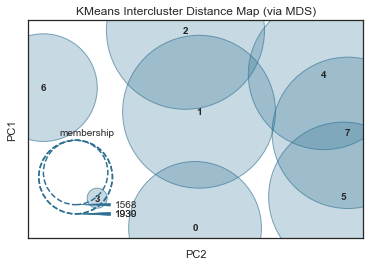

In [7]:
# Kmeans k=8
visualizer_ind = InterclusterDistance(km_k8)
visualizer_ind.fit(X) 
visualizer_ind.show();  

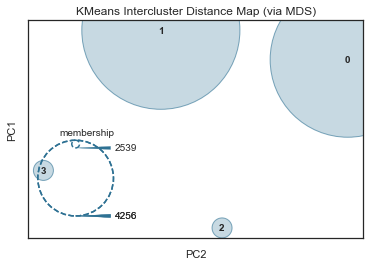

In [8]:
# kmeans k=4
visualizer_ind = InterclusterDistance(km_k4)
visualizer_ind.fit(X) 
visualizer_ind.show();  

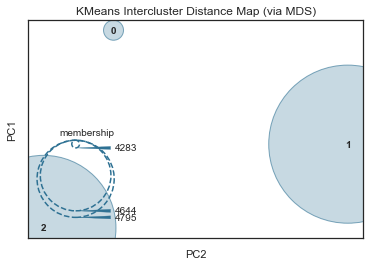

In [9]:
# kmeans k=3
visualizer_ind = InterclusterDistance(km_k3)
visualizer_ind.fit(X) 
visualizer_ind.show();  

**Comment:**

From the intercluster distance maps above, we can see that k = 8 has a lot of overlapping for the clusters formed, while k =3 and 4 do not have overlapping.

#### 3.1.2.2 Silhouette Visualizer

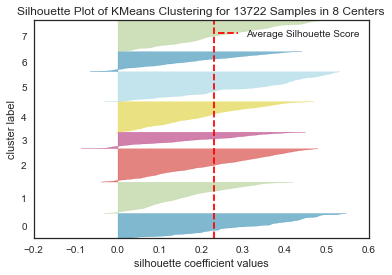

In [10]:
# construct SilhouetteVisualizer for kmeans k = 8
visualizer_sv = SilhouetteVisualizer(km_k8, colors='yellowbrick')
visualizer_sv.fit(X) 
visualizer_sv.show();  

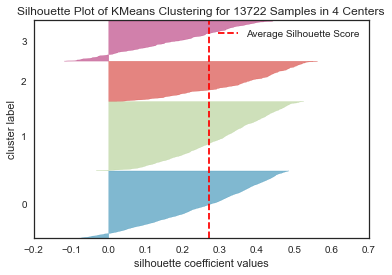

In [11]:
# construct SilhouetteVisualizer for kmeans k = 4
visualizer_sv = SilhouetteVisualizer(km_k4, colors='yellowbrick')
visualizer_sv.fit(X)
visualizer_sv.show();  

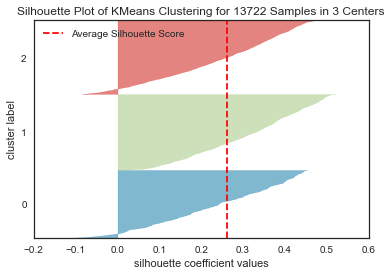

In [12]:
# construct SilhouetteVisualizer for kmeans k = 3
visualizer_sv = SilhouetteVisualizer(km_k3, colors='yellowbrick')
visualizer_sv.fit(X)
visualizer_sv.show();  

**Comment:**

From the Silhouette plots,  we can observe from each of the plot, all clusters are above the average Silhouette score.

Below we explore also the thickness of each cluster and Silhouette coefficients in each plot:

for k = 8, the thickness of each clusters are quite similar, except for cluster 3 which is thinner; however, 5 out of 8 clusters have negative Silhouette coeffficient, indicating those samples might have been assigned to the wrong cluster.

for k = 4, the thickness of each clusters are quite similar except that cluster 1 is slightly larger; 2 out of 4 clusters have negative Silhouette coeffficient, indicating those samples might have been assigned to the wrong cluster.

for k = 3, the thickness of each clusters are quite similar; however, 2 out of 3 clusters have negative Silhouette coeffficient, indicating those samples might have been assigned to the wrong cluster.

With that we dive deeper into the clusters formed in each model and compare and contrast

In [13]:
# create new dataframe to include the labels from the model
X_km_k8 = X.copy()
X_km_k4 = X.copy()
X_km_k3 = X.copy()

X_km_k8['cluster_label'] = km_k8.labels_
X_km_k4['cluster_label'] = km_k4.labels_
X_km_k3['cluster_label'] = km_k3.labels_

In [14]:
km_k8_y = X_km_k8['cluster_label']
km_k8_X = X_km_k8.drop(columns=['cluster_label'])

km_k4_y = X_km_k4['cluster_label']
km_k4_X = X_km_k4.drop(columns=['cluster_label'])

km_k3_y = X_km_k3['cluster_label']
km_k3_X = X_km_k3.drop(columns=['cluster_label'])

#### 3.1.2.3 RadViz Plots

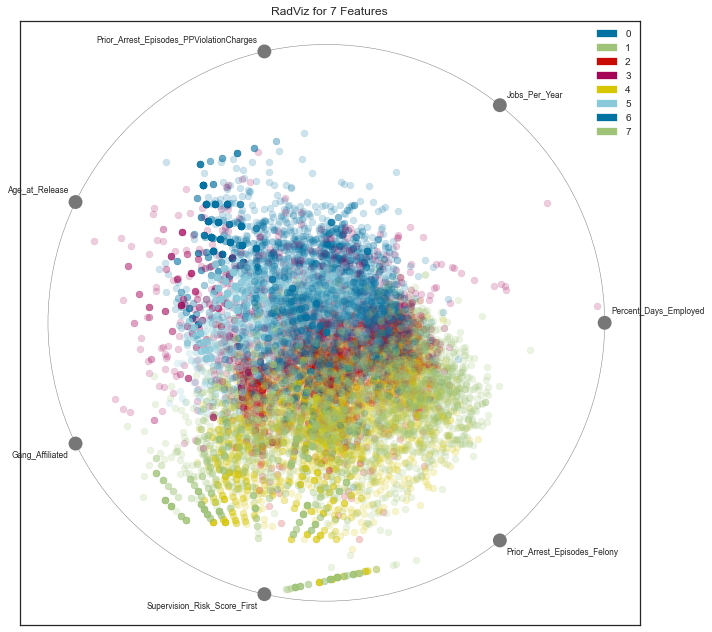

<AxesSubplot:title={'center':'RadViz for 7 Features'}>

In [15]:
classes = list(range(8))
# Instantiate the visualizer
visualizer = RadViz(classes=classes, size=(800,800),alpha=0.2)
visualizer.fit(km_k8_X, km_k8_y)           # Fit the data to the visualizer
visualizer.transform(km_k8_X)        # Transform the data
visualizer.show()

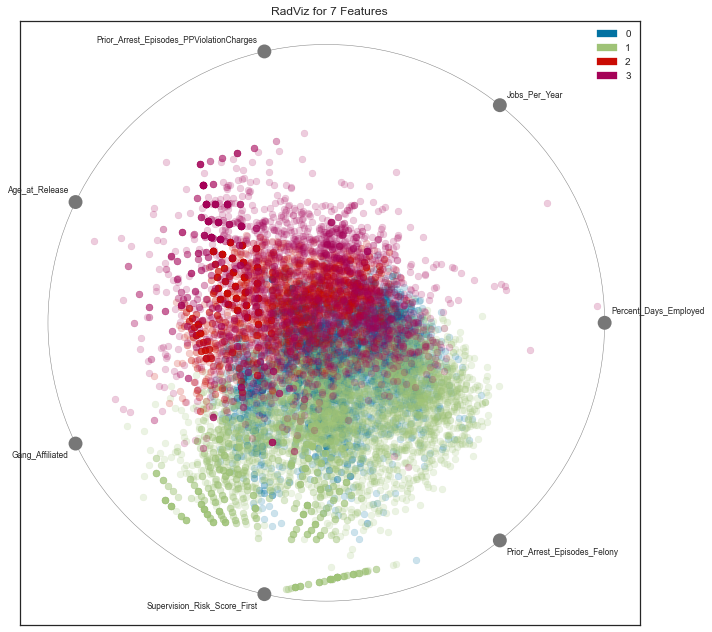

In [16]:
classes = [0,1,2,3]

# Instantiate the visualizer
visualizer = RadViz(classes=classes, size=(800,800),alpha=0.2)

visualizer.fit(km_k4_X, km_k4_y)           # Fit the data to the visualizer
visualizer.transform(km_k4_X)        # Transform the data
visualizer.show()
plt.show()

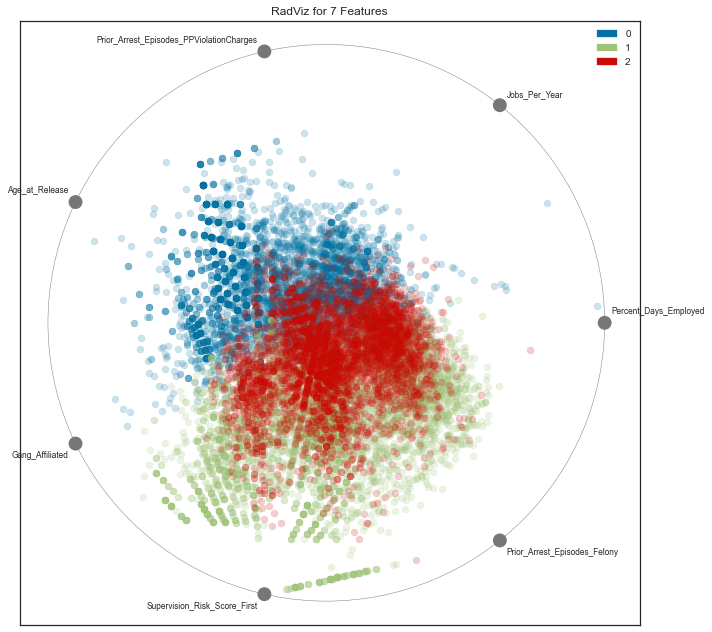

In [17]:
classes = [0,1,2]

# Instantiate the visualizer
visualizer = RadViz(classes=classes, size=(800,800),alpha=0.2)

visualizer.fit(km_k3_X, km_k3_y)           # Fit the data to the visualizer
visualizer.transform(km_k3_X)        # Transform the data
visualizer.show()
plt.show()

**Comment:**

From the radviz plots, k = 3 for kmeans clustering appears to form groups that are more separable.

## 3.2 Hierarchical Clustering

In hierarchical clustering , we use the Agglomerative hierarchical clustering, which takes a bottom up approach. We cluster the dataset with different linkage types, namely single, complete, and average.

### 3.2.1 Single Linkage

In [18]:
# initialize hierachical clustering model object with single linkage
hc_sing = AgglomerativeClustering(linkage='single')

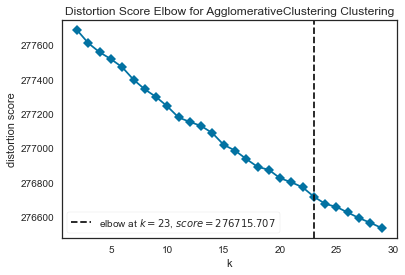

In [19]:
# find the best k using Elbow plot
visualizer = KElbowVisualizer(hc_sing, k=(2,30), timings = False)
visualizer.fit(X)
visualizer.show();

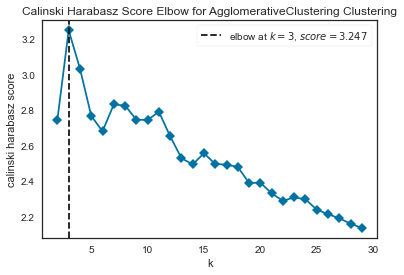

In [20]:
# find the best k using Elbow plot with calinski harabasz score
visualizer = KElbowVisualizer(hc_sing, k=(2,30), metric='calinski_harabasz', timings=False)
visualizer.fit(X)
visualizer.show();

In [21]:
# fit hierachical clustering model with single linkage for k =3
hc_sing_k3=AgglomerativeClustering(n_clusters = 3, linkage='single').fit(X)

In [22]:
# get cluster labels 
X_hc_sing_k3 = X.copy()
X_hc_sing_k3['cluster_label'] = hc_sing_k3.labels_

In [23]:
hc_sing_k3_y = X_hc_sing_k3['cluster_label']
hc_sing_k3_X = X_hc_sing_k3.drop(columns=['cluster_label'])

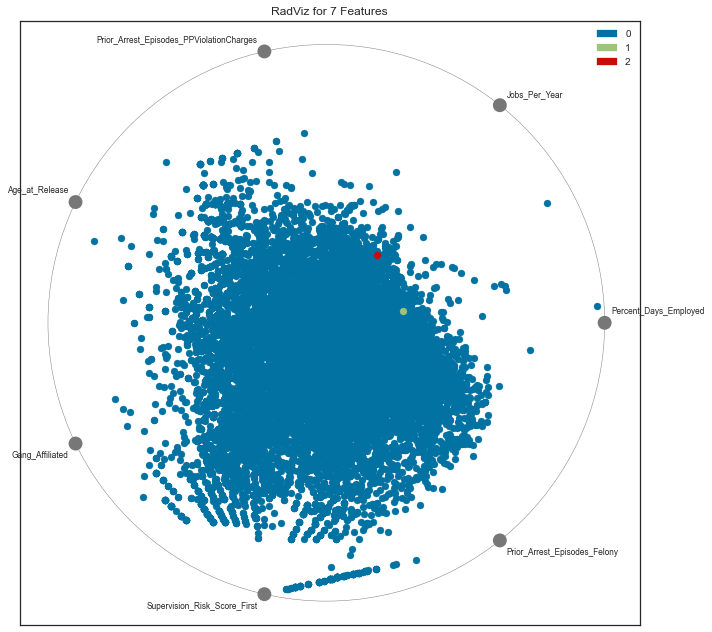

<AxesSubplot:title={'center':'RadViz for 7 Features'}>

In [24]:
classes = [0,1,2]

# Instantiate the visualizer
visualizer = RadViz(classes=classes, size=(800,800))

visualizer.fit(hc_sing_k3_X, hc_sing_k3_y)           # Fit the data to the visualizer
visualizer.transform(hc_sing_k3_X)        # Transform the data
visualizer.show()

**Comment**

Hierachical clustering with single link seems not to yield a good model as visualised from the radvizplot

### 3.2.2 Complete Linkage

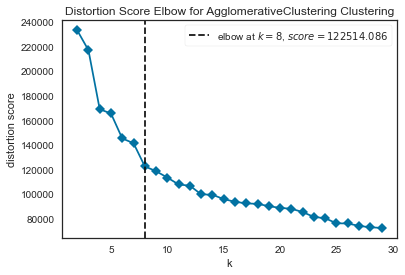

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# initialize hierachical clustering model object with complete linkage
hc_com=AgglomerativeClustering(linkage='complete')
# find the best k using Elbow plot
visualizer_hc_c = KElbowVisualizer(hc_com, k=(2,30), timings=False)
visualizer_hc_c.fit(X)
visualizer_hc_c.show()

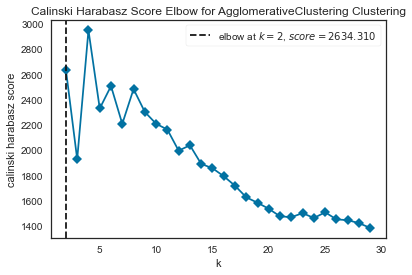

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [26]:
# find the best k using Elbow plot with calinski harabasz score
visualizer_hc_c2 = KElbowVisualizer(hc_com, k=(2,30), metric='calinski_harabasz', timings=False)
visualizer_hc_c2.fit(X)
visualizer_hc_c2.show()

In [27]:
# fit hierachical clustering model with complete linkage for k = 8 and k = 4
hc_com_k8 = AgglomerativeClustering(n_clusters=8,linkage='complete').fit(X)
hc_com_k4 = AgglomerativeClustering(n_clusters=4,linkage='complete').fit(X)

In [28]:
# get cluster labels 
X_hc_com_k8 = X.copy()
X_hc_com_k4 = X.copy()
X_hc_com_k8['cluster_label'] = hc_com_k8.labels_
X_hc_com_k4['cluster_label'] = hc_com_k4.labels_

hc_com_k8_y = X_hc_com_k8['cluster_label']
hc_com_k8_X = X_hc_com_k8.drop(columns=['cluster_label'])

hc_com_k4_y = X_hc_com_k4['cluster_label']
hc_com_k4_X = X_hc_com_k4.drop(columns=['cluster_label'])

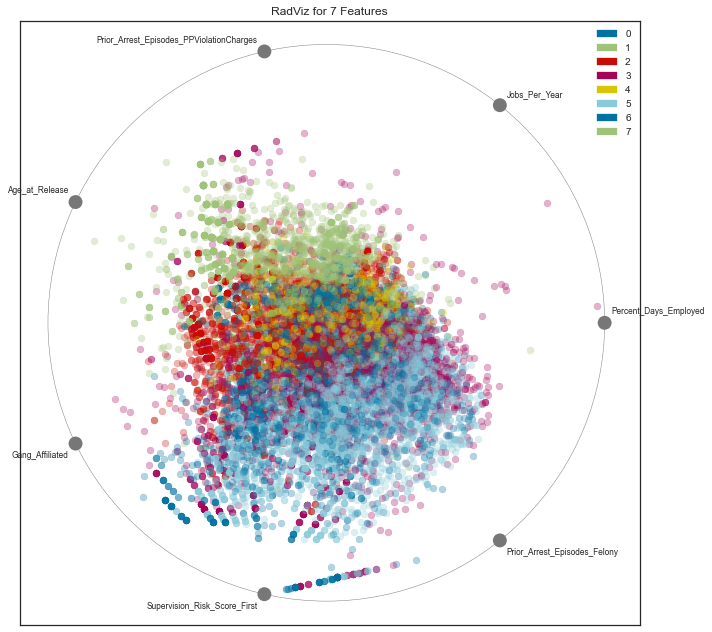

<AxesSubplot:title={'center':'RadViz for 7 Features'}>

In [29]:
classes = [0,1,2,3,4,5,6,7]

# Instantiate the visualizer
visualizer = RadViz(classes=classes, size=(800,800),alpha=0.3)

visualizer.fit(hc_com_k8_X, hc_com_k8_y)           # Fit the data to the visualizer
visualizer.transform(hc_com_k8_X)        # Transform the data
visualizer.show()

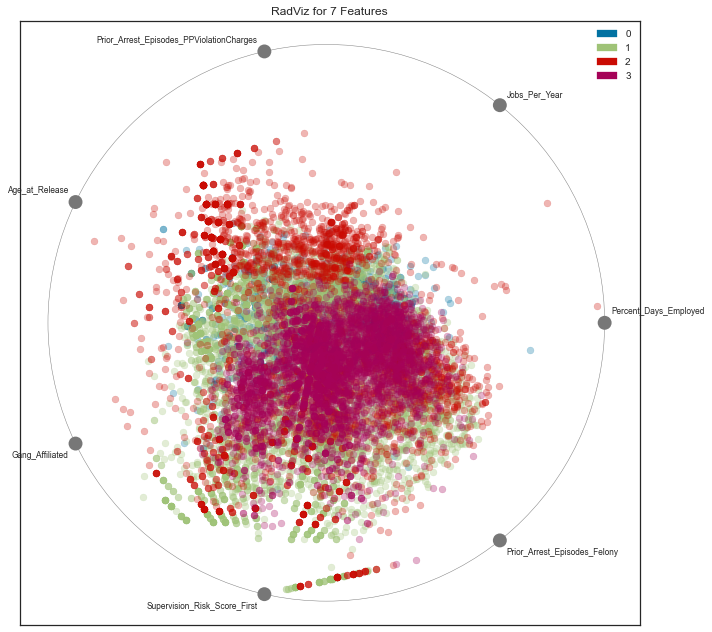

<AxesSubplot:title={'center':'RadViz for 7 Features'}>

In [30]:
classes = [0,1,2,3]

# Instantiate the visualizer
visualizer = RadViz(classes=classes, size=(800,800),alpha=0.3)

visualizer.fit(hc_com_k4_X, hc_com_k4_y)           # Fit the data to the visualizer
visualizer.transform(hc_com_k4_X)        # Transform the data
visualizer.show()

**Comment**

Hierachical clustering with complete linkage seems not to yield good clusters as visualised from the radvizplot.

### 3.2.3 Average Linkage

In [31]:
# initialize hierachical clustering model object with average linkage
hc_avg = AgglomerativeClustering(linkage='average')

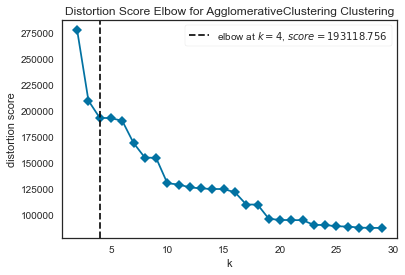

In [32]:
# find the best k using Elbow plot
visualizer = KElbowVisualizer(hc_avg, k=(2,30), timings = False)
visualizer.fit(X)
visualizer.show(); 

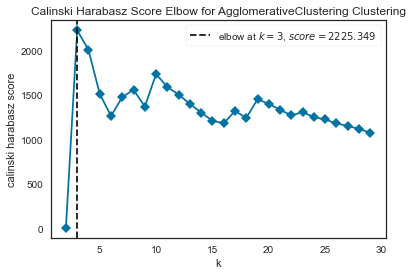

In [33]:
# find the best k using Elbow plot with calinski harabasz score
visualizer = KElbowVisualizer(hc_avg, k=(2,30), metric='calinski_harabasz', timings=False)
visualizer.fit(X)
visualizer.show();

In [34]:
# fit hierachical clustering model with average linkage for k = 4 and k = 3
hc_avg_k4 = AgglomerativeClustering(n_clusters = 4,linkage='average',).fit(X)
hc_avg_k3 = AgglomerativeClustering(n_clusters = 3,linkage='average',).fit(X)

In [35]:
# get cluster labels 
X_hc_avg_k4 = X.copy()
X_hc_avg_k3 = X.copy()

X_hc_avg_k4['cluster_label'] = hc_avg_k4.labels_
X_hc_avg_k3['cluster_label'] = hc_avg_k3.labels_

hc_avg_k4_y = X_hc_avg_k4['cluster_label']
hc_avg_k4_X = X_hc_avg_k4.drop(columns=['cluster_label'])

hc_avg_k3_y = X_hc_avg_k3['cluster_label']
hc_avg_k3_X = X_hc_avg_k3.drop(columns=['cluster_label'])

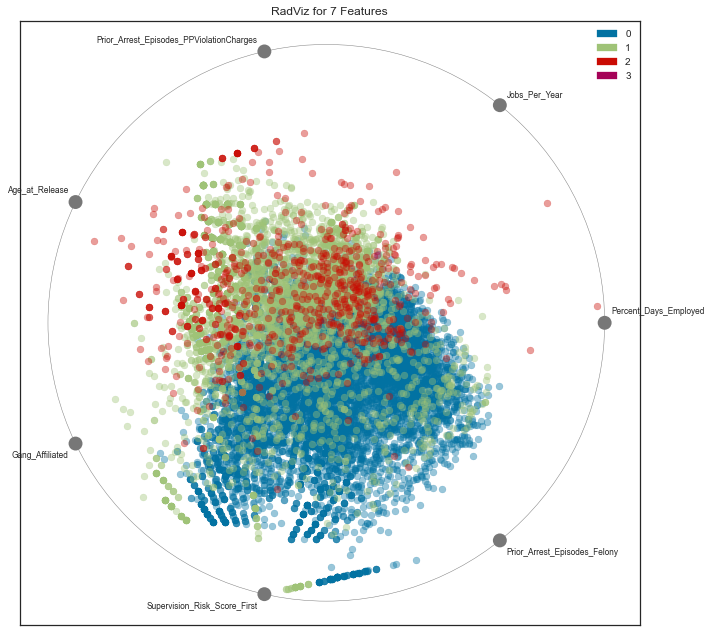

<AxesSubplot:title={'center':'RadViz for 7 Features'}>

In [36]:
classes = [0,1,2,3]

# Instantiate the visualizer
visualizer = RadViz(classes=classes, size=(800,800),alpha=0.4)

visualizer.fit(hc_avg_k4_X, hc_avg_k4_y)           # Fit the data to the visualizer
visualizer.transform(hc_avg_k4_X)        # Transform the data
visualizer.show()

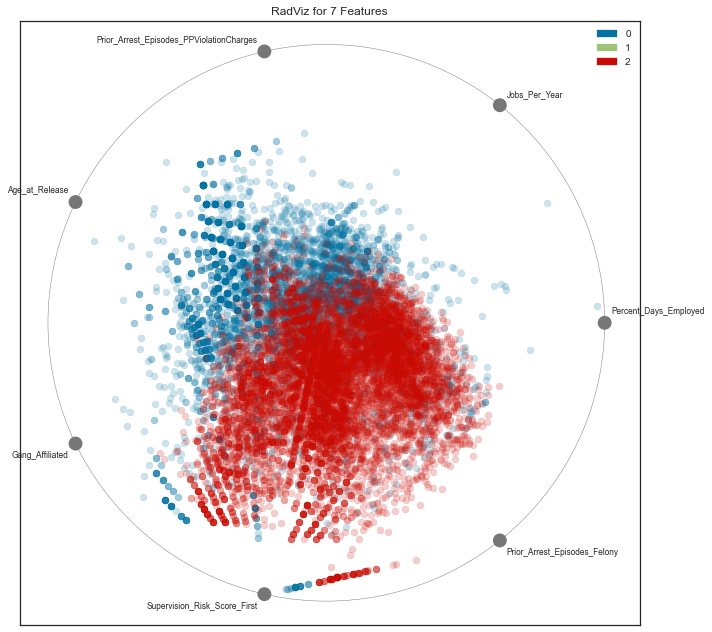

<AxesSubplot:title={'center':'RadViz for 7 Features'}>

In [37]:
classes = [0,1,2]

# Instantiate the visualizer
visualizer = RadViz(classes=classes, size=(800,800),alpha=0.2)

visualizer.fit(hc_avg_k3_X, hc_avg_k3_y)           # Fit the data to the visualizer
visualizer.transform(hc_avg_k3_X)        # Transform the data
visualizer.show()

**Comments:** 

Hierachical clustering with average link does not really yield good clusters as visualised from the radvizplot.

### 3.3 Deep dive into k = 3 clusters formed with Kmeans

In [38]:
# create dataframe for each cluster
c1 = X_km_k3[X_km_k3['cluster_label']==0]
c2 = X_km_k3[X_km_k3['cluster_label']==1]
c3 = X_km_k3[X_km_k3['cluster_label']==2]

In [39]:
# for visualization purpose 
c1 = c1.drop(columns='cluster_label')
c2 = c2.drop(columns='cluster_label')
c3 = c3.drop(columns='cluster_label')


In [40]:
print(f"Number and percentage of observations in cluster 1:", len(c1), 'and', round(len(c1)/ len(X)*100, 2), '%')
print("Number and percentage of observations in cluster 2:", len(c2), 'and',  round(len(c2)/ len(X)*100, 2), '%')
print("Number and percentage of observations in cluster 3:", len(c3), 'and',  round(len(c3)/len(X)*100, 2), '%')

Number and percentage of observations in cluster 1: 4283 and 31.21 %
Number and percentage of observations in cluster 2: 4795 and 34.94 %
Number and percentage of observations in cluster 3: 4644 and 33.84 %


### 3.4  Visualizing the clusters

#### 3.4.1 Boxplots

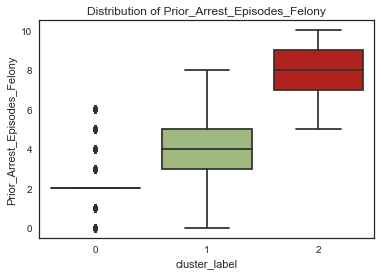

In [41]:
# Prior_Arrest_Episodes_Felony
sns.boxplot(y="Prior_Arrest_Episodes_Felony", x="cluster_label", data=X_km_k3).set(title = "Distribution of Prior_Arrest_Episodes_Felony")

plt.show()

**Comments**

We can see from the boxplots that the distribution of Prior_Arrest_Episodes_Felony is very different in each cluster: 
cluster 0 has the lowest Prior_Arrest_Episodes_Felony, cluster 1 falls in the middle, while cluser 2 has highest number.


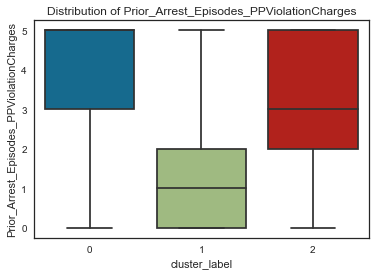

In [42]:
# Prior_Arrest_Episodes_PPViolationCharges
sns.boxplot(y="Prior_Arrest_Episodes_PPViolationCharges", x="cluster_label", data=X_km_k3).set(title = "Distribution of Prior_Arrest_Episodes_PPViolationCharges")
plt.show()

**Comments**

We can see from the boxplots that the distribution of Prior_Arrest_Episodes_PPViolationCharges is quite different in each cluster.


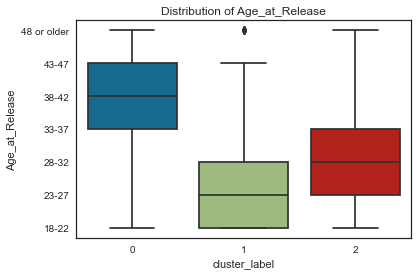

In [43]:
# Age_at_Release
sns.boxplot(y="Age_at_Release", x="cluster_label", data=X_km_k3).set(title = "Distribution of Age_at_Release")
plt.yticks([0,1,2,3,4,5,6], ['18-22', '23-27', '28-32','33-37', '38-42', '43-47', '48 or older'])
plt.show()

**Comments**

Distribution of Age_at_Release are also different for each clusters

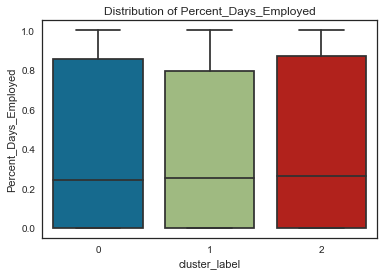

In [44]:
# Percent_Days_Employed
sns.boxplot(y="Percent_Days_Employed", x="cluster_label", data=X_km_k3).set(title = "Distribution of Percent_Days_Employed")
plt.show()

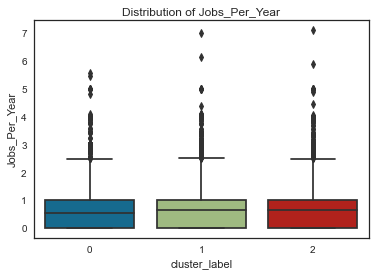

In [45]:
# Jobs_Per_Year
sns.boxplot(y="Jobs_Per_Year", x="cluster_label", data=X_km_k3).set(title = "Distribution of Jobs_Per_Year")
plt.show()

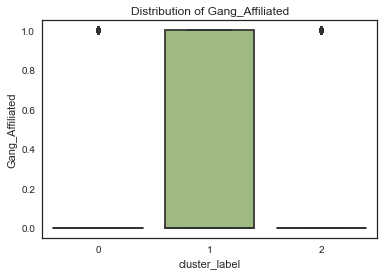

In [46]:
# Gang_Affiliated
sns.boxplot(y="Gang_Affiliated", x="cluster_label", data=X_km_k3).set(title = "Distribution of Gang_Affiliated")
plt.show()

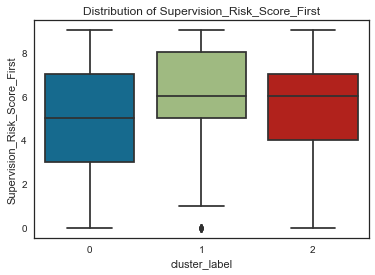

In [47]:
# Supervision_Risk_Score_First
sns.boxplot(y="Supervision_Risk_Score_First", x="cluster_label", data=X_km_k3).set(title = "Distribution of Supervision_Risk_Score_First")
plt.show()

**Discussion**

- We can see from the boxplots that the distribution of Prior_Arrest_Episodes_Felony is very different in each cluster. cluster 0 has the lowest Prior_Arrest_Episodes_Felony, cluster 1 falls in the middle, while cluser 2 has highest number

- The clusters also clearly differ in terms of the distribtuion of Prior_Arrest_Episodes_PPViolationCharges and Age_at_release.


#### 3.4.2 Radar Plot

In [48]:
# create dataframe

df_y = df_c[['Recidivism_Arrest_Year1','Recidivism_Arrest_Year2','Recidivism_Arrest_Year3']]
df_y.reset_index(drop=True, inplace=True)
df_y

Recidivism_Arrest_Year1  Recidivism_Arrest_Year2  \
0                          0.0                      0.0   
1                          0.0                      1.0   
2                          1.0                      0.0   
3                          0.0                      0.0   
4                          1.0                      0.0   
...                        ...                      ...   
13717                      0.0                      1.0   
13718                      1.0                      0.0   
13719                      0.0                      1.0   
13720                      0.0                      1.0   
13721                      1.0                      0.0   

       Recidivism_Arrest_Year3  
0                          1.0  
1                          0.0  
2                          0.0  
3                          1.0  
4                          0.0  
...                        ...  
13717                      0.0  
13718                      0.0  
13719                      0.0  
13720                      0.0  
13721                      0.0  

[13722 rows x 3 columns]

In [49]:
# check the dataframe before minmax
c1.describe()

Percent_Days_Employed  Jobs_Per_Year  \
count            4283.000000    4283.000000   
mean                0.396628       0.700232   
std                 0.409710       0.807710   
min                 0.000000       0.000000   
25%                 0.000000       0.000000   
50%                 0.242319       0.535557   
75%                 0.854104       1.000000   
max                 1.000000       5.562183   

       Prior_Arrest_Episodes_PPViolationCharges  Age_at_Release  \
count                               4283.000000     4283.000000   
mean                                   3.767686        4.090591   
std                                    1.720406        1.498625   
min                                    0.000000        0.000000   
25%                                    3.000000        3.000000   
50%                                    5.000000        4.000000   
75%                                    5.000000        5.000000   
max                                    5.000000        6.000000   

       Gang_Affiliated  Supervision_Risk_Score_First  \
count      4283.000000                   4283.000000   
mean          0.120476                      4.676862   
std           0.325556                      2.551972   
min           0.000000                      0.000000   
25%           0.000000                      3.000000   
50%           0.000000                      5.000000   
75%           0.000000                      7.000000   
max           1.000000                      9.000000   

       Prior_Arrest_Episodes_Felony  
count                   4283.000000  
mean                       2.252393  
std                        0.951432  
min                        0.000000  
25%                        2.000000  
50%                        2.000000  
75%                        2.000000  
max                        6.000000

In [50]:
# Using MinMaxScaler() for comparing different features
# we 
c1_s = MinMaxScaler().fit_transform(c1)
c1_s = pd.DataFrame(c1_s, columns=c1.columns)
c2_s = MinMaxScaler().fit_transform(c2)
c2_s = pd.DataFrame(c2_s, columns=c2.columns)
c3_s = MinMaxScaler().fit_transform(c3)
c3_s = pd.DataFrame(c3_s, columns=c3.columns)

In [51]:
# verify the dataframe after minmax
c1_s.describe()

Percent_Days_Employed  Jobs_Per_Year  \
count            4283.000000    4283.000000   
mean                0.396628       0.125892   
std                 0.409710       0.145215   
min                 0.000000       0.000000   
25%                 0.000000       0.000000   
50%                 0.242319       0.096285   
75%                 0.854104       0.179786   
max                 1.000000       1.000000   

       Prior_Arrest_Episodes_PPViolationCharges  Age_at_Release  \
count                               4283.000000     4283.000000   
mean                                   0.753537        0.681765   
std                                    0.344081        0.249771   
min                                    0.000000        0.000000   
25%                                    0.600000        0.500000   
50%                                    1.000000        0.666667   
75%                                    1.000000        0.833333   
max                                    1.000000        1.000000   

       Gang_Affiliated  Supervision_Risk_Score_First  \
count      4283.000000                   4283.000000   
mean          0.120476                      0.519651   
std           0.325556                      0.283552   
min           0.000000                      0.000000   
25%           0.000000                      0.333333   
50%           0.000000                      0.555556   
75%           0.000000                      0.777778   
max           1.000000                      1.000000   

       Prior_Arrest_Episodes_Felony  
count                   4283.000000  
mean                       0.375399  
std                        0.158572  
min                        0.000000  
25%                        0.333333  
50%                        0.333333  
75%                        0.333333  
max                        1.000000

In [52]:
# transpose for radar plot
df_c1 = pd.DataFrame(c1_s.mean()).T
df_c2 = pd.DataFrame(c2_s.mean()).T
df_c3 = pd.DataFrame(c3_s.mean()).T

In [53]:
# create radar plot using the plotly 
categories = list(df_c1.columns)
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=df_c1.iloc[0],theta=categories, fill='toself',name='Cluster 1', ))
fig.add_trace(go.Scatterpolar(r=df_c2.iloc[0],theta=categories,fill='toself', name='Cluster 2'))
fig.add_trace(go.Scatterpolar(r=df_c3.iloc[0],theta=categories,fill='toself',name='Cluster 3'))
fig.update_layout(title='KMeans k=3 Clusters Radar Plot',polar=dict(radialaxis=dict(visible=True,range=[0, 1])),showlegend=True)
py.offline.iplot(fig)

## Answer to Q3:

We cluster our dataset into 3 groups using Kmeans clustering, among the models, we chose the k = 3 clusters for this purpose.

From the model, we can see that the cluster have different distribution in terms of Prior_Arrest_Episodes_Felony, Prior_Arrest_Episodes_PPViolationCharges, Age_at_Release, Gang_Affiliated.

For example, cluster 0 has the highest Prior_Arrest_Episodes_Felony, cluster 1 falls in the middle, while cluser 2 has lowest number. The clusters also clearly differ in the distribtuion of Prior_Arrest_Episodes_PPViolationCharges and Age_at_release.

# Future Work

Given extra time, we could search for extra datasets and information from the authority. With extra information, we could potentially reduce the existing irreducible error in our model and improve the accuracy.

1. **Extra data to be included:**

    - *Employment record of the individual*
    
        - Reason: from the feature importance in our models in question 1, they produced a consensus that suggests that Percent_Days Employed and Jobs_Per_Year are the most important features. We wish to further explore the types of jobs and potentially job security is an important factor affecting recidivism
             
    - *Financial Information of the individual*
    
        - Reason: an extension from the employment information, financial information, such as credit history, bankruptcy history, may suggest relationships with recidivism

  

  - *Census data*
      - Public Use Microdata Areas (PUMA) 
         - Reason: PUMA could be added to explore any relationship between recidivism and the community that the individual lives

    - *Georgia Department of Community Supervision*
        - Information regarding Community Supervision 
        
          - Reason: to explore the effectiveness of community supervision and relationship

    - *Other information related to criminal history* 


2. **Potential Improvements:**

    - *Question 1:*
        We tried to improve recall in our model as our primary goal is to ensure public safety, we could also explore the precision to improve the wrongful conviction cases.

    - *Question 2:*
        Since the implementation of scikit-learn's ROC curve is restricted to the binary classification task (see  scikit-learn documentation), we shall explore the ROC AUC curve visualization for multiclass classification.

    - *Question 3:*
        Further explore dendrogram for hierarchical clustering.

3. **Other questions we could answer from the dataset:**
    - Is recidivism biased based on race?
    - Are the undereducated/underemployed population more susceptible to recidivism?
    - Community supervision 
    - Other policy implications

# The End

---

# References

- ISLR - Chapter 12.4: Clustering Methods
- In-class Clustering Exercise
- [RadViz](https://www.scikit-yb.org/en/latest/api/features/radviz.html)
- [PLotly's Radar Plot](https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca)
